In [1]:
from helper import *

In [2]:
# Set environment variables
config = Config()

station_url = config.station_url
pattern_station = config.pattern_station
clean_symbols = config.clean_symbols
census_url = config.census_url
pattern_census = config.pattern_census
columns_to_impute = config.columns_to_impute
testing_fraction = config.testing_fraction
latitude_groups = config.latitude_groups
climate_columns = config.climate_columns
happiness_columns = config.happiness_columns
dependent_var = config.dependent_var
target_column = config.target_column
reference_csv_census_location = config.reference_csv_census_location
optimal_num_clusters = config.optimal_num_clusters

Dataset Download, Preprocessing & Cleaning

In [3]:
# Download and convert the files for dataset 1
process_dataset_1(station_url, pattern_station, clean_symbols, 
                  '../data/ds1/landing/stations_txt',
                  '../data/ds1/landing/stations_csv', 
                  '../data/ds1/bronze/stations_csv_clean')

# Downloads, converts, cleans, and combines dataset 2
process_dataset_2(config.census_url, config.pattern_census, 
                  '../data/ds2/landing/census_xlsx',
                  '../data/ds2/landing/census_csv', 
                  '../data/ds2/bronze/census_csv_clean',
                  '../data/ds2/bronze/census_csv_combined')

# Impute missing values in dataset 1
impute_missing_values_for_dataset_1('../data/ds1/bronze/stations_csv_clean',
                                    '../data/ds1/silver/stations_csv_clean_imputed', 
                                     config.columns_to_impute,
                                     group_by="mm")

Part 1

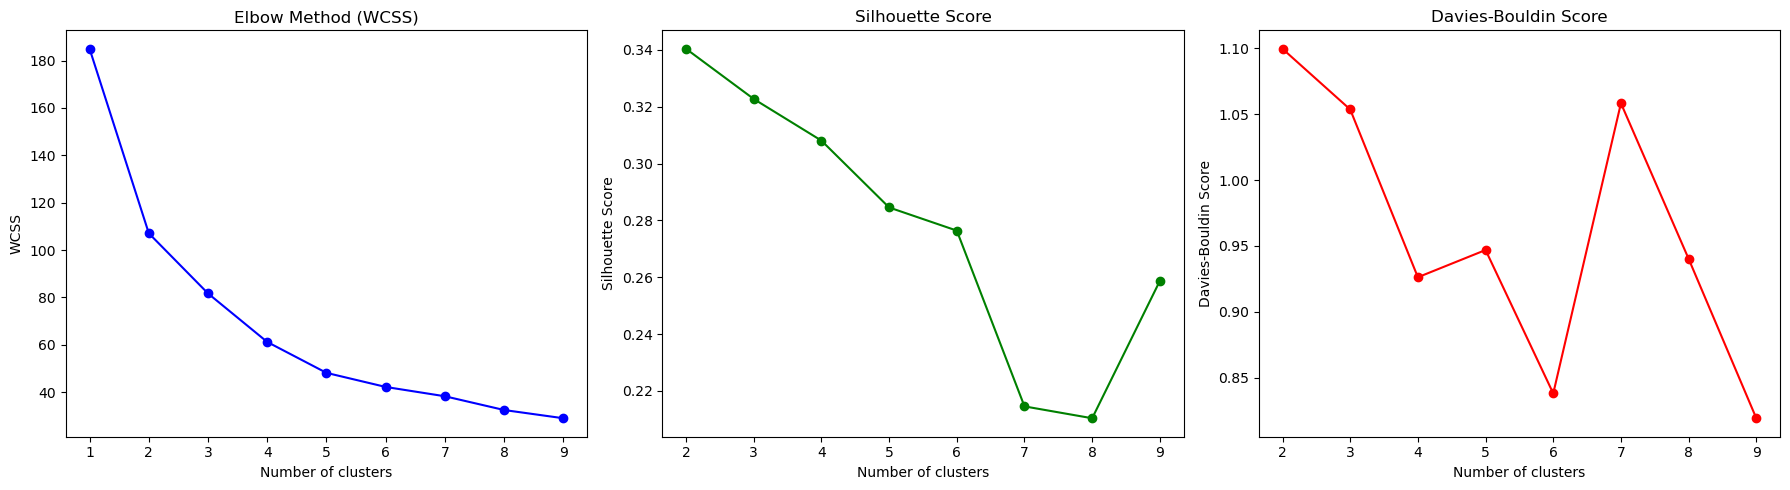

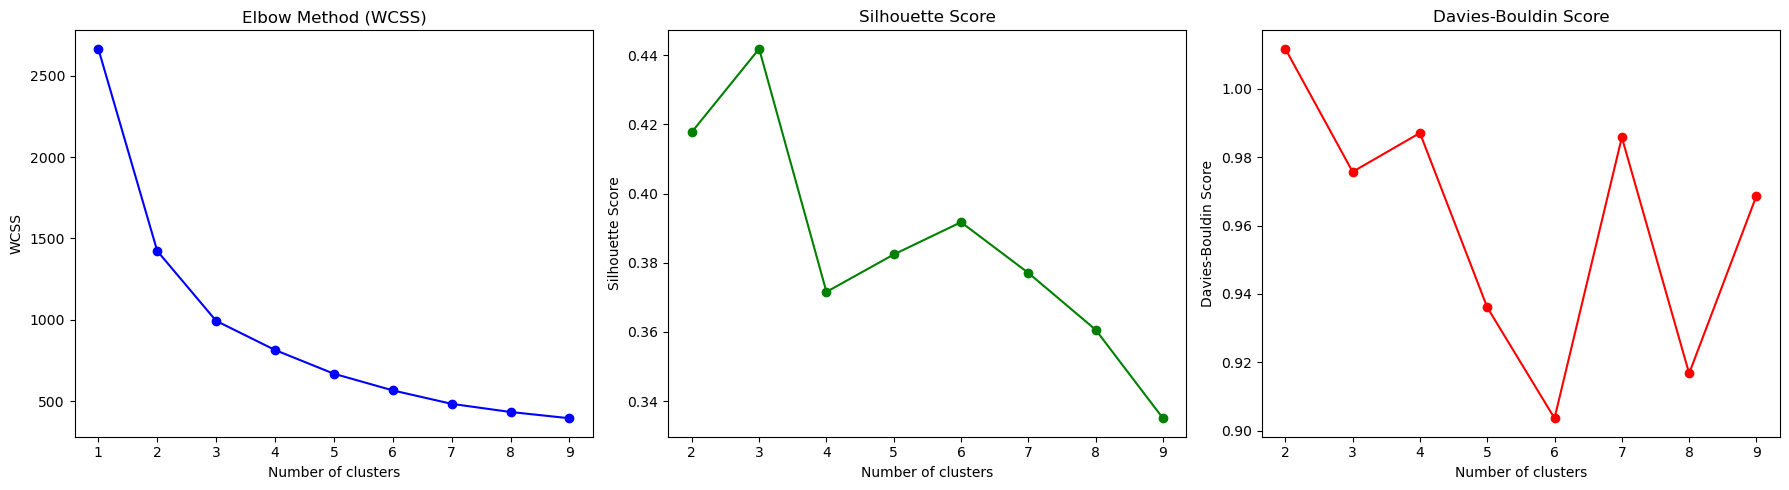

Not enough clusters to calculate silhouette and Davies-Bouldin scores.
        tmax (degC)                                                        \
              count       mean       std        min        25%        50%   
cluster                                                                     
0              16.0  12.079184  1.041787   9.509562  11.609457  12.343686   
1              18.0  13.886715  0.755609  12.481786  13.357649  13.985990   
2               3.0  11.078118  0.546531  10.591872  10.782366  10.972860   

                              sun (hours)                                    \
               75%        max       count        mean       std         min   
cluster                                                                       
0        12.823857  13.520797        16.0  107.978833  8.060978   89.092672   
1        14.532073  14.991466        18.0  132.235576  9.186004  114.297127   
2        11.321242  11.669623         3.0   97.626313  0.818244   97.03

In [4]:
output_folder_ds1_csv_clean_imputed = '../data/ds1/silver/stations_csv_clean_imputed'
output_folder_ds1_coordinates = '../data/ds1/reference/locations'
stations_total_average_df, stations_monthly_average_df, stations_total_average_df_labeled,\
stations_monthly_average_df_labeled, stations_monthly_average_df_labeled_manual, stations_total_average_df_dbscan, cluster_stats  = process_and_cluster_weather_data(output_folder_ds1_csv_clean_imputed, output_folder_ds1_coordinates,
                                           '../data/ds1/silver/clustering_datasets',
                                           '../data/ds1/silver/clustering_datasets_labeled',
                                           config.optimal_num_clusters)

print(cluster_stats)

Part 2

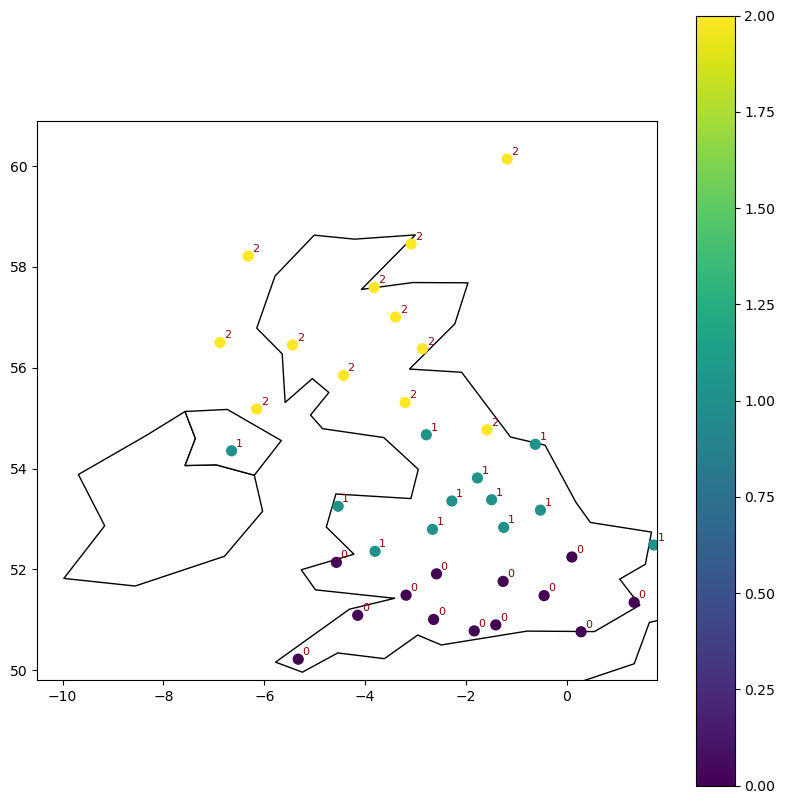

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Model Accuracy: 0.4
----------------------------------------
Best Model Parameters: {'subsample': 0.7999999999999999, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
----------------------------------------


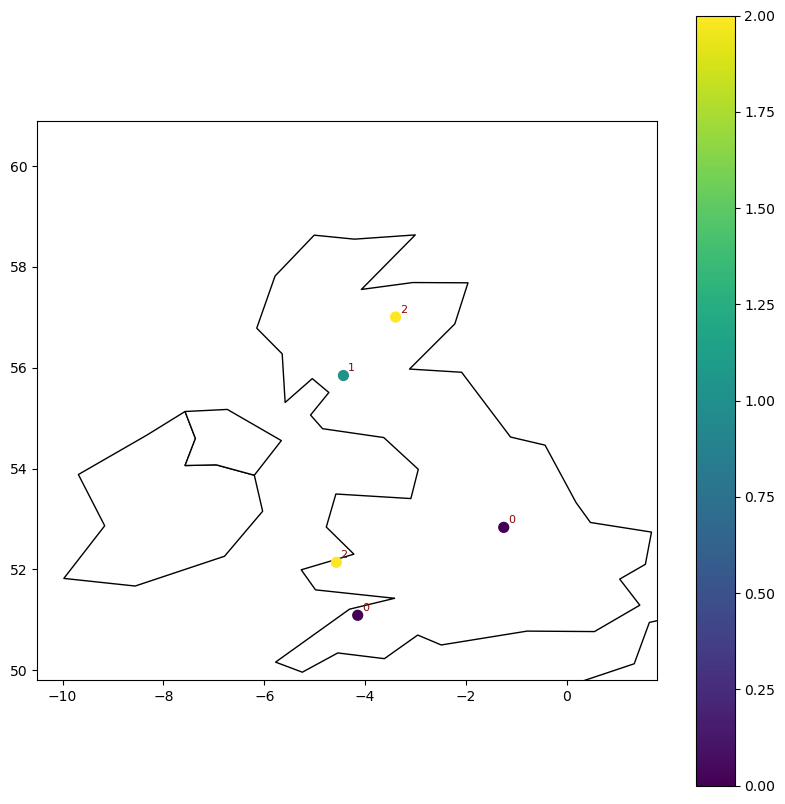

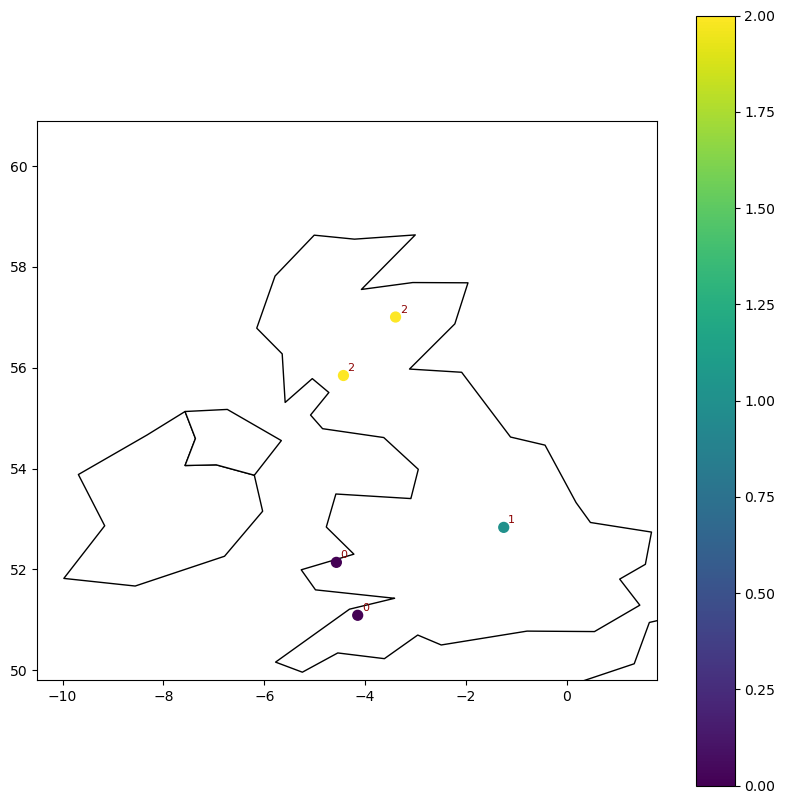

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Model Accuracy: 1.0
----------------------------------------
Best Model Parameters: {'subsample': 0.9, 'n_estimators': 150, 'max_depth': 8, 'learning_rate': 0.03111111111111111, 'colsample_bytree': 0.7999999999999999}
----------------------------------------


In [5]:
stations_total_labeled_file_name = stations_total_average_df_labeled
stations_monthly_labeled_file_name = stations_monthly_average_df_labeled

process_and_classify_by_latitude(stations_total_labeled_file_name, stations_monthly_labeled_file_name, 
                                 '../data/ds1/silver/latitude_label/',
                                 latitude_groups, testing_fraction, target_column)

Part 3

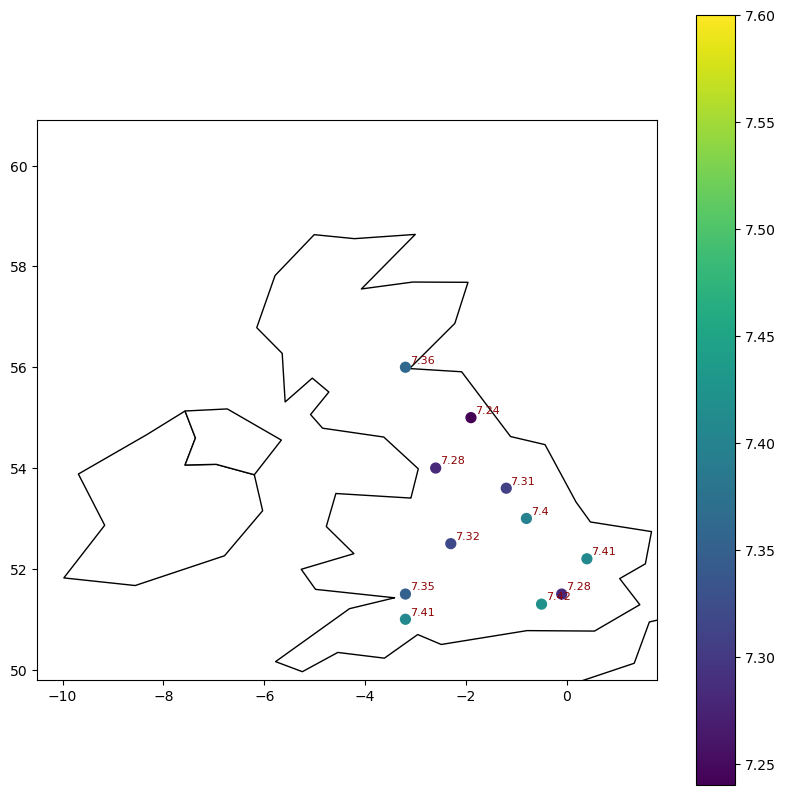

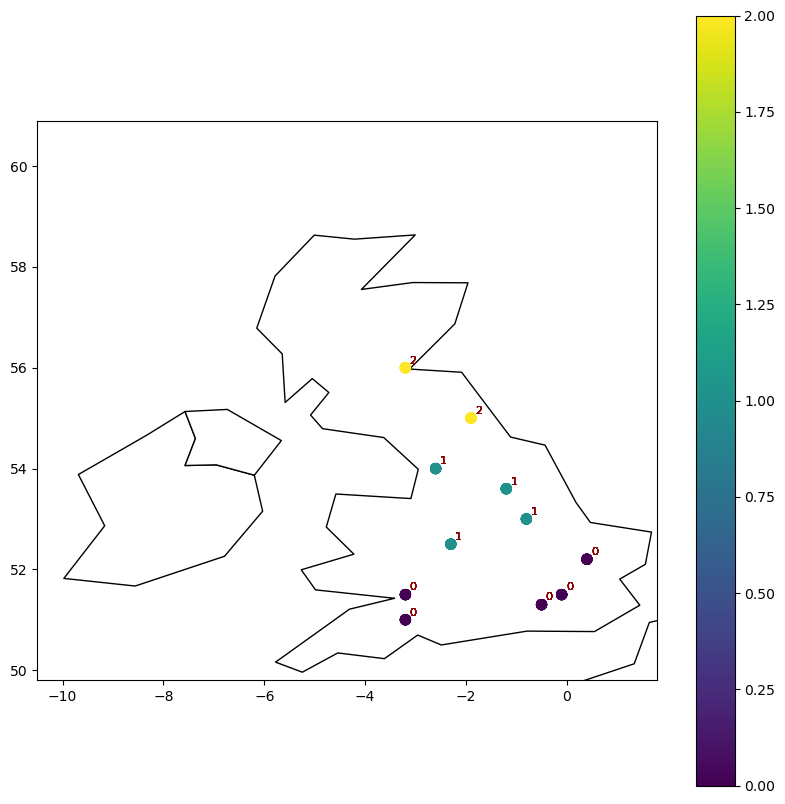

Climate Descriptive Statistics:
           tmax (degC)                                                      \
                count       mean       std       min       25%        50%   
lat_group                                                                   
0                60.0  14.756082  5.307469  7.043939  9.968216  14.597733   
1                60.0  13.065496  5.123728  6.006897  8.224022  12.726853   
2                24.0  12.394154  4.804347  5.968276  8.345282  12.150000   

                                tmin (degC)            ...  rain (mm)  \
                 75%        max       count      mean  ...        75%   
lat_group                                              ...              
0          19.796053  23.086842        60.0  6.775937  ...  66.807609   
1          18.064647  20.941558        60.0  6.064260  ...  64.240710   
2          16.894395  19.690278        24.0  4.965697  ...  64.252612   

                      sun (hours)                                

In [6]:
df_census_closest_station = process_census_happiness_data(
    reference_csv_census_location=reference_csv_census_location,
    file_census_happiness_csv='../data/ds2/bronze/census_csv_combined/combined_dataset.csv',
    stations_latitude_label_csv='../data/ds1/silver/latitude_label/stations_latitutde_total_average.csv',
    output_folder="../data/ds2/silver/census_csv_clean_location"
)
analyze_weather_and_happiness_impact(df_census_closest_station, climate_columns, happiness_columns, dependent_var)
